# Intro to Neural Networks

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Inspiration from Actual Neurons

"The signaling process is partly electrical and partly chemical. Neurons are electrically excitable, due to maintenance of voltage gradients across their membranes. If the voltage changes by a large enough amount over a short interval, the neuron generates an all-or-nothing electrochemical pulse called an action potential. This potential travels rapidly along the axon, and activates synaptic connections as it reaches them. Synaptic signals may be excitatory or inhibitory, increasing or reducing the net voltage that reaches the soma." (https://en.wikipedia.org/wiki/Neuron)

Another important idea from neurology is the "all-or-none" principle: <br/> (https://en.wikipedia.org/wiki/Neuron#All-or-none_principle)

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very densely.

One of the distinctive features of a neuron is that it has a kind of activation potential: If the electric signal reaching a neuron is strong enough, the neuron will fire, sending electrical signals further along the network. Thus  there is a kind of input-output structure to neurons that the artificial networks will be mimicking.

For our DS purposes, we'll generally imagine our network to consist of only a few layers, including an input layer (where we feed in our data) an output layer (comprising our predictions). Significantly, there will also (generally) be one or more layers of neurons between input and output, called 'hidden layers'.

There may also be bias terms, which function much like an intercept term.

This should so far sound much like linear regression: Have the computer choose weights on the various input parameters so as to optimize the predictions on outputs.

But there are, of course, important differences. Let's look at the most important ones now.

## Model Training

Neural nets generally don't accept the entire dataset all at once. Thus we often want to specify a *batch size*, which will break our data up into chunks of that size.


## Backpropagation

Moreover, neural nets are dynamic in the sense that, after a certain number of data points have been passed through the model, the weights will be *updated* with an eye toward optimizing our loss function. (Thinking back to biological neurons, this is like revising their activation potentials.) Typically, this is  done  by using some version of gradient descent, but [other approaches have been attempted](https://arxiv.org/abs/1605.02026).

One of the most popular optimizers these days is called 'Adam', which generalizes from ordinary gradient descent by having individual and dynamic learning rates. [This article](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) has a nice discussion of Adam.

For the mathematical details, check out [this post](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/).

Given that we are only passing *some* data points through at any one time, the question of *when* to update the weights becomes pressing. Standardly, we'd wait until we've passed all the data through before updating, but we might try updating after each batch ("batch gradient descent") or even after each point ("stochastic gradient descent"). [This post](https://datascience.stackexchange.com/questions/27421/when-are-weights-updated-in-cnn) has more details.

## Epochs

One pass of our data through and back is called an 'epoch'. Generally speaking, one epoch is NOT enough to see significant error reduction. But, because of the power of gradient descent, there are often very significant strides  made after a few tens or hundreds of epochs.

## Activation Functions

The functions "inside the neurons" are generally non-linear. More on this below.

## Who Cares?

Remember graph theory? [Neural networks are much like computational graphs](https://medium.com/tebs-lab/deep-neural-networks-as-computational-graphs-867fcaa56c9). (This is why Tensorflow is useful for constructing neural networks! More on this tomorrow.)

And computational graphs can be used [to approximate *any* function](http://neuralnetworksanddeeplearning.com/chap4.html).

I highly encourage following that last link, by the way.

## Coding a Network from Scratch

In [1]:
# Let's start by constructing a generic function to mimic the firing of neurons.


def neuron_fires(input_layer, weights, biases, activation_function):
    return activation_function(np.dot(weights, input_layer) + biases)

In [4]:
# Now we'll choose two points at random from a standard normal distribution.
in_act = np.random.uniform(-1, 1, size=2)

# To fill in the weights, we want a matrix with as many columns as there are input values / neurons
# and as many rows as there are neurons in the hidden layer.
in_to_hid = np.random.randn(3, 2)

# Let's suppose a simple set of biases where each = 1.
hid_bias = np.ones(3)

# To generate the values in the hidden layer, we'll execute our function!
hid_act = neuron_fires(in_act, in_to_hid, hid_bias, activation_function=lambda x: x)

print('Input layer: ', in_act)
print('Weight matrix: \n', in_to_hid)
print('Hidden layer: ', hid_act)

Input layer:  [0.88215166 0.96072115]
Weight matrix: 
 [[ 0.39373841  1.00544873]
 [ 1.36996739  0.23535809]
 [-1.04023096 -0.61040596]]
Hidden layer:  [ 2.31329286  2.4346325  -0.50407138]


In [25]:
# We'll now do the same thing for the step between the hidden layer and the output layer.



In [26]:
# And now we'll execute our function one more time.



At this point we'd want to compare this output (perhaps rounded to 1 if we're doing a classification problem) with our observed target value so that we can adjust the weights!

## Activation Functions

Some common activation functions:

**binary step**: $f(x) = 0$ if $x\leq 0$; $f(x) = 1$ otherwise

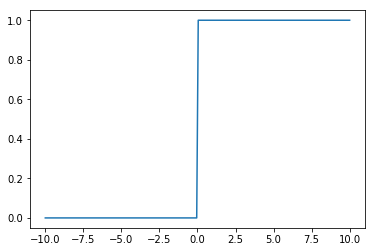

In [11]:
# Coding binary step:

X = np.linspace(-10, 10, 200)
y_bs = list(np.zeros(100))
y_bs.extend(list(np.ones(100)))

plt.plot(X, y_bs);

**ReLU**: $f(x) = 0$ if $x\leq 0$; $f(x) = x$ otherwise

In [27]:
# Coding ReLU:



**Sigmoid**: $f(x) = \frac{1}{1 + e^{-x}}$

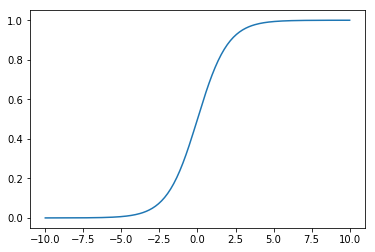

In [21]:
# Coding Sigmoid:



**tanh**: $f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

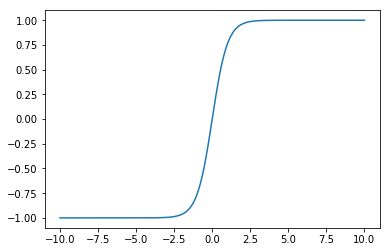

In [23]:
# Coding tanh:



**Softsign**: $f(x) = \frac{x}{1 + |x|}$

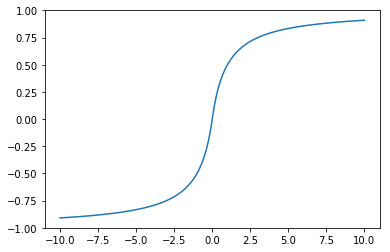

In [24]:
# Coding Softsign:



Notice that ReLU ("Rectified Linear Unit") increases without bound as $x\rightarrow\infty$. The advantages and drawbacks of this are discussed on [this page on stackexchange](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks)

## Loss Functions

[Loss functions for neural networks](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)

## GUI!

[Tinker with a neural network online](https://playground.tensorflow.org)